## Explanatory Analysis

Climate dataset in Surabaya from January 2013 until May 2021.

In [1]:
import pandas as pd

df = pd.read_csv("Climate_Sby_2013-2021.csv")

df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2013,24.0,34.3,27.6,85.0,42.2,2.0,11.0,280.0,3.0,W
1,02-01-2013,24.0,32.6,27.7,86.0,99.1,5.0,12.0,280.0,4.0,W
2,03-01-2013,26.0,32.9,28.2,83.0,68.0,0.1,9.0,280.0,3.0,W
3,04-01-2013,25.0,32.8,28.1,82.0,0.0,2.3,8.0,270.0,4.0,W
4,05-01-2013,25.0,30.0,27.3,86.0,11.6,0.0,9.0,240.0,3.0,W


In [2]:
df.tail()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
3072,31-05-2021,26.6,33.7,29.3,78.0,3.5,2.7,3.0,130.0,2.0,E
3073,1-6-2021,26.6,34.2,29.5,78.0,0.0,7.0,4.0,120.0,1.0,C
3074,2-6-2021,26.8,34.8,29.8,78.0,5.4,7.0,4.0,110.0,2.0,E
3075,3-6-2021,27.0,34.0,30.0,78.0,0.0,7.8,5.0,110.0,2.0,E
3076,4-6-2021,26.5,34.4,29.4,83.0,2.0,9.5,6.0,120.0,2.0,E


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  3077 non-null   object 
 1   Tn       3054 non-null   float64
 2   Tx       3053 non-null   float64
 3   Tavg     3059 non-null   float64
 4   RH_avg   3059 non-null   float64
 5   RR       2647 non-null   float64
 6   ss       3030 non-null   float64
 7   ff_x     3061 non-null   float64
 8   ddd_x    3061 non-null   float64
 9   ff_avg   3061 non-null   float64
 10  ddd_car  3061 non-null   object 
dtypes: float64(9), object(2)
memory usage: 264.6+ KB


## Feature Engineering

### Handle Missing Value

In [4]:
df = df.fillna(method ='pad')

In [5]:
df.tail()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
3072,31-05-2021,26.6,33.7,29.3,78.0,3.5,2.7,3.0,130.0,2.0,E
3073,1-6-2021,26.6,34.2,29.5,78.0,0.0,7.0,4.0,120.0,1.0,C
3074,2-6-2021,26.8,34.8,29.8,78.0,5.4,7.0,4.0,110.0,2.0,E
3075,3-6-2021,27.0,34.0,30.0,78.0,0.0,7.8,5.0,110.0,2.0,E
3076,4-6-2021,26.5,34.4,29.4,83.0,2.0,9.5,6.0,120.0,2.0,E


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  3077 non-null   object 
 1   Tn       3077 non-null   float64
 2   Tx       3077 non-null   float64
 3   Tavg     3077 non-null   float64
 4   RH_avg   3077 non-null   float64
 5   RR       3077 non-null   float64
 6   ss       3077 non-null   float64
 7   ff_x     3077 non-null   float64
 8   ddd_x    3077 non-null   float64
 9   ff_avg   3077 non-null   float64
 10  ddd_car  3077 non-null   object 
dtypes: float64(9), object(2)
memory usage: 264.6+ KB


Convert Tanggal column type to datetime

In [7]:
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')

dataset = pd.read_csv('Climate_Sby_2013-2021.csv', header=0, parse_dates=[0], date_parser=dateparse)

dataset = dataset.fillna(method ='pad')

dataset.head(15)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2013-01-01,24.0,34.3,27.6,85.0,42.2,2.0,11.0,280.0,3.0,W
1,2013-01-02,24.0,32.6,27.7,86.0,99.1,5.0,12.0,280.0,4.0,W
2,2013-01-03,26.0,32.9,28.2,83.0,68.0,0.1,9.0,280.0,3.0,W
3,2013-01-04,25.0,32.8,28.1,82.0,0.0,2.3,8.0,270.0,4.0,W
4,2013-01-05,25.0,30.0,27.3,86.0,11.6,0.0,9.0,240.0,3.0,W
5,2013-01-06,25.0,33.0,27.9,81.0,1.5,2.4,10.0,290.0,3.0,W
6,2013-01-07,25.0,32.6,28.1,82.0,20.4,0.0,8.0,260.0,4.0,W
7,2013-01-08,26.0,33.1,28.7,75.0,0.0,5.2,9.0,260.0,4.0,W
8,2013-01-09,26.0,31.4,28.1,77.0,0.8,0.4,10.0,270.0,5.0,W
9,2013-01-10,26.0,33.9,29.7,71.0,0.0,8.0,12.0,270.0,6.0,W


In [8]:
dataset['Tanggal'].dtype

dtype('<M8[ns]')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  3077 non-null   datetime64[ns]
 1   Tn       3077 non-null   float64       
 2   Tx       3077 non-null   float64       
 3   Tavg     3077 non-null   float64       
 4   RH_avg   3077 non-null   float64       
 5   RR       3077 non-null   float64       
 6   ss       3077 non-null   float64       
 7   ff_x     3077 non-null   float64       
 8   ddd_x    3077 non-null   float64       
 9   ff_avg   3077 non-null   float64       
 10  ddd_car  3077 non-null   object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 264.6+ KB


In [10]:
df_Tavg = dataset[['Tanggal', 'Tavg']]
df_Tn = dataset[['Tanggal', 'Tn']]
df_Tx = dataset[['Tanggal', 'Tx']]
df_RHavg = dataset[['Tanggal', 'RH_avg']]

df_Tavg.head()

,Tanggal,Tavg
0,2013-01-01,27.6
1,2013-01-02,27.7
2,2013-01-03,28.2
3,2013-01-04,28.1
4,2013-01-05,27.3


In [11]:
df_Tavg['Tanggal'].dtype

dtype('<M8[ns]')

In [12]:
df_Tn.head()

,Tanggal,Tn
0,2013-01-01,24.0
1,2013-01-02,24.0
2,2013-01-03,26.0
3,2013-01-04,25.0
4,2013-01-05,25.0


In [13]:
df_Tx.head()

,Tanggal,Tx
0,2013-01-01,34.3
1,2013-01-02,32.6
2,2013-01-03,32.9
3,2013-01-04,32.8
4,2013-01-05,30.0


In [14]:
df_RHavg.head()

,Tanggal,RH_avg
0,2013-01-01,85.0
1,2013-01-02,86.0
2,2013-01-03,83.0
3,2013-01-04,82.0
4,2013-01-05,86.0


Build Model

Forecast for Average Temperature

In [15]:
df_Tavg.index = df_Tavg['Tanggal']

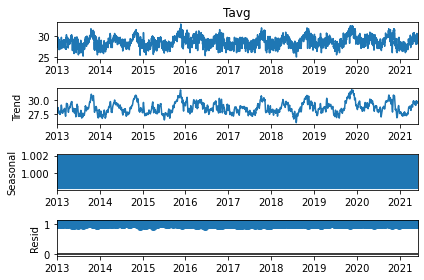

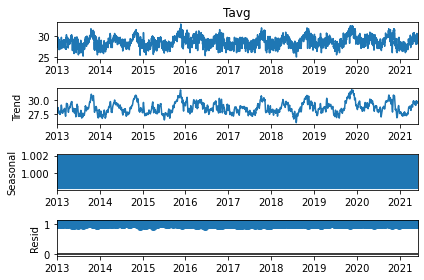

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_a = seasonal_decompose(df_Tavg['Tavg'], model='multiplicative')
result_a.plot()

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_Tavg['Tavg'], order=(1,0,1), seasonal_order=(2,1,0,6))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [18]:
model_fit = model.fit()

In [19]:
output = model_fit.forecast()
output

2021-06-05    29.569005
Freq: D, dtype: float64

In [20]:
pred1 = model_fit.forecast(28)
pred1

2021-06-05    29.569005
2021-06-06    29.200442
2021-06-07    29.574792
2021-06-08    29.849231
2021-06-09    29.104641
2021-06-10    29.785488
2021-06-11    29.583353
2021-06-12    29.588760
2021-06-13    29.817465
2021-06-14    29.946019
2021-06-15    29.068561
2021-06-16    29.924543
2021-06-17    29.354783
2021-06-18    29.366767
2021-06-19    29.633937
2021-06-20    29.866406
2021-06-21    29.384654
2021-06-22    29.707473
2021-06-23    29.499634
2021-06-24    29.385119
2021-06-25    29.674723
2021-06-26    29.886864
2021-06-27    29.189552
2021-06-28    29.804092
2021-06-29    29.479521
2021-06-30    29.445651
2021-07-01    29.708002
2021-07-02    29.899490
Freq: D, Name: predicted_mean, dtype: float64

Forecast for Minimum Temperature

In [21]:
df_Tn.index = df_Tn['Tanggal']

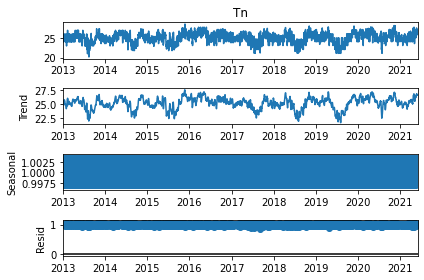

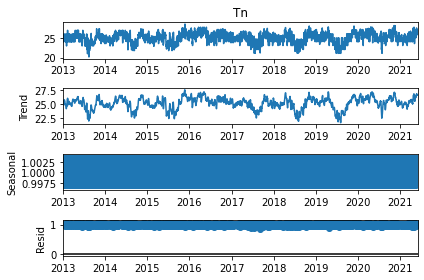

In [22]:
result_b = seasonal_decompose(df_Tn['Tn'], model='multiplicative')
result_b.plot()

In [23]:
model = SARIMAX(df_Tn['Tn'], order=(2,1,2), seasonal_order=(1,1,0,12))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [24]:
model_fit = model.fit()

In [25]:
pred2 = model_fit.forecast(28)
pred2

2021-06-05    27.061908
2021-06-06    26.845051
2021-06-07    27.179027
2021-06-08    27.261979
2021-06-09    26.295125
2021-06-10    25.890488
2021-06-11    26.469837
2021-06-12    26.582905
2021-06-13    26.643112
2021-06-14    26.090671
2021-06-15    26.590297
2021-06-16    26.423730
2021-06-17    26.719217
2021-06-18    27.063003
2021-06-19    27.334218
2021-06-20    27.377004
2021-06-21    26.173033
2021-06-22    25.897674
2021-06-23    26.545157
2021-06-24    26.635856
2021-06-25    26.596947
2021-06-26    26.456326
2021-06-27    26.753562
2021-06-28    26.497866
2021-06-29    26.854576
2021-06-30    27.000395
2021-07-01    27.244930
2021-07-02    27.359006
Freq: D, Name: predicted_mean, dtype: float64

Forecast for Maximum Temperature

In [26]:
df_Tx.index = df_Tx['Tanggal']

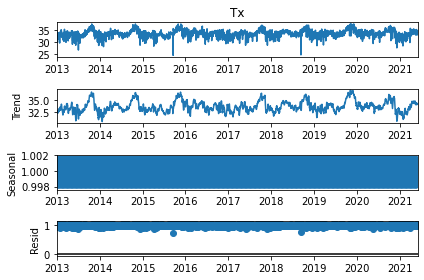

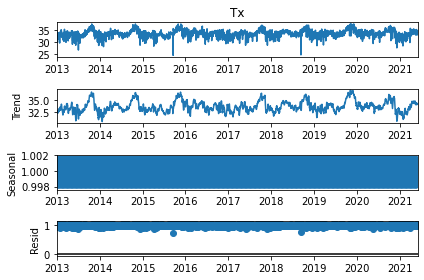

In [27]:
result_c = seasonal_decompose(df_Tx['Tx'], model='multiplicative')
result_c.plot()

In [28]:
model = SARIMAX(df_Tx['Tx'], order=(2,2,1), seasonal_order=(1,1,0,6))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [29]:
model_fit = model.fit()

In [30]:
pred3 = model_fit.forecast(28)
pred3

2021-06-05    33.997131
2021-06-06    34.580156
2021-06-07    34.421403
2021-06-08    34.611538
2021-06-09    34.106102
2021-06-10    34.814989
2021-06-11    33.605368
2021-06-12    34.246645
2021-06-13    34.421524
2021-06-14    34.818933
2021-06-15    34.164899
2021-06-16    34.718169
2021-06-17    33.916285
2021-06-18    34.528432
2021-06-19    34.535134
2021-06-20    34.828172
2021-06-21    34.249488
2021-06-22    34.881656
2021-06-23    33.874161
2021-06-24    34.501326
2021-06-25    34.593268
2021-06-26    34.939323
2021-06-27    34.322891
2021-06-28    34.915521
2021-06-29    34.012171
2021-06-30    34.632058
2021-07-01    34.681258
2021-07-02    35.000845
Freq: D, Name: predicted_mean, dtype: float64

Forecast for Average Humidity

In [31]:
df_RHavg.index = df_RHavg['Tanggal']

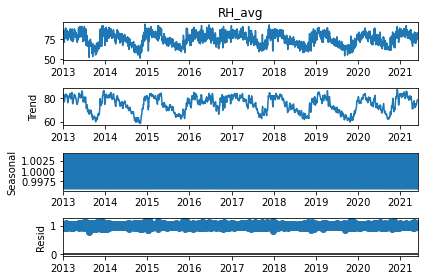

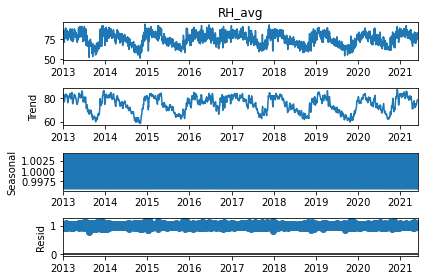

In [32]:
result_c = seasonal_decompose(df_RHavg['RH_avg'], model='multiplicative')
result_c.plot()

In [33]:
model = SARIMAX(df_RHavg['RH_avg'], order=(2,1,2), seasonal_order=(1,2,1,6))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [34]:
model_fit = model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [35]:
pred4 = model_fit.forecast(28)
pred4

2021-06-05    80.165913
2021-06-06    78.186478
2021-06-07    76.917845
2021-06-08    77.794258
2021-06-09    79.924323
2021-06-10    79.772646
2021-06-11    80.548967
2021-06-12    78.337517
2021-06-13    77.389422
2021-06-14    78.086251
2021-06-15    79.080055
2021-06-16    81.391745
2021-06-17    80.401882
2021-06-18    78.424253
2021-06-19    77.205889
2021-06-20    78.104813
2021-06-21    79.510730
2021-06-22    80.808306
2021-06-23    80.524517
2021-06-24    78.509783
2021-06-25    77.342172
2021-06-26    78.221498
2021-06-27    79.394263
2021-06-28    81.189225
2021-06-29    80.544866
2021-06-30    78.580248
2021-07-01    77.350451
2021-07-02    78.281779
Freq: D, Name: predicted_mean, dtype: float64

In [36]:
pred1.to_csv('prediction_dataset.csv')

In [37]:
pred1

2021-06-05    29.569005
2021-06-06    29.200442
2021-06-07    29.574792
2021-06-08    29.849231
2021-06-09    29.104641
2021-06-10    29.785488
2021-06-11    29.583353
2021-06-12    29.588760
2021-06-13    29.817465
2021-06-14    29.946019
2021-06-15    29.068561
2021-06-16    29.924543
2021-06-17    29.354783
2021-06-18    29.366767
2021-06-19    29.633937
2021-06-20    29.866406
2021-06-21    29.384654
2021-06-22    29.707473
2021-06-23    29.499634
2021-06-24    29.385119
2021-06-25    29.674723
2021-06-26    29.886864
2021-06-27    29.189552
2021-06-28    29.804092
2021-06-29    29.479521
2021-06-30    29.445651
2021-07-01    29.708002
2021-07-02    29.899490
Freq: D, Name: predicted_mean, dtype: float64

<AxesSubplot:title={'center':'Prediksi temperatur'}>

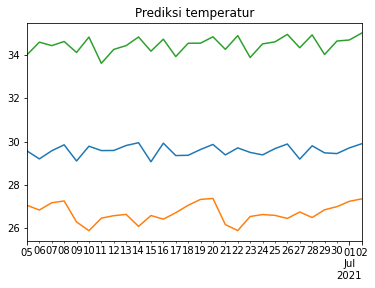

In [38]:
pred1.plot(title='Prediksi temperatur')
pred2.plot()
pred3.plot()

<AxesSubplot:title={'center':'Prediksi kelembapan'}>

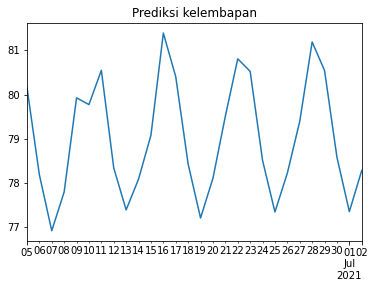

In [39]:
pred4.plot(title='Prediksi kelembapan')

In [57]:
import joblib

# Set model name
filename='build_model.pkl'

# Pickle it
joblib.dump(model, filename)

# # Load the model back in
loaded_model = joblib.load(path)

# Update the model
# loaded_model.update(df)

FileNotFoundError: [Errno 2] No such file or directory: 'gs://first-cloud-step-308017.appspot.com/build_model/model_export/build_model.pkl'